Exploratory Data Analysis (EDA)

1.1 Data Inspection

In [59]:
import warnings
warnings.filterwarnings('ignore')


In [11]:
import shap
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,IsolationForest,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, ConfusionMatrixDisplay, log_loss
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from keras.layers import Dense
from sklearn.inspection import permutation_importance

In [12]:
data= pd.read_csv('dataset.csv')

In [13]:
data.head()

Name  Epoch Date Close Approach Relative Velocity km per sec  \
0  3703080               7.889472e+11                    Very Slow   
1  3723955                        NaN                         Slow   
2  2446862               7.895520e+11                          NaN   
3  3092506               7.901568e+11                    Very Slow   
4  3514799               7.901568e+11                    Very Slow   

   Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  \
0                 22017.003799    13680.509944                  0.419483   
1                 65210.346095    40519.173105                       NaN   
2                 27326.560182    16979.661798                  0.050956   
3                 40225.948191    24994.839864                       NaN   
4                 35426.991794             NaN                  0.407832   

   Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles)  \
0         163.178711              62753692.0         38993336.0   
1                NaN              57298148.0         35603420.0   
2          19.821890               7622911.5          4736657.5   
3                NaN                     NaN         26522368.0   
4         158.646713              61010824.0                NaN   

   Jupiter Tisserand Invariant  ...  Aphelion Dist  Perihelion Time  \
0                          NaN  ...       2.005764              NaN   
1                          NaN  ...       1.497352     2.457795e+06   
2                        4.557  ...       1.966857     2.458120e+06   
3                        5.093  ...       1.527904     2.457902e+06   
4                        5.154  ...            NaN     2.457814e+06   

   Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
0    264.837533     0.590551            NaN             1.0           1.0   
1    173.741112     0.845330         1995.0             1.0           1.0   
2           NaN          NaN         1995.0             NaN           8.0   
3     68.741007     0.700277         1995.0             NaN          15.0   
4           NaN          NaN            NaN             NaN          15.0   

   Orbital Period  Orbit Uncertainity  Hazardous  
0             Low              Medium       True  
1             Low                 NaN      False  
2          Medium                 NaN       True  
3             Low              Medium      False  
4             NaN                 Low       True  

[5 rows x 24 columns]

In [14]:
data.dtypes

Name                              int64
Epoch Date Close Approach       float64
Relative Velocity km per sec     object
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Jupiter Tisserand Invariant     float64
Epoch Osculation                float64
Semi Major Axis                 float64
Asc Node Longitude              float64
Perihelion Arg                  float64
Aphelion Dist                   float64
Perihelion Time                 float64
Mean Anomaly                    float64
Mean Motion                     float64
approach_year                   float64
approach_month                  float64
approach_day                    float64
Orbital Period                   object
Orbit Uncertainity               object
Hazardous                          bool
dtype: object

In [15]:
data.describe().T

count          mean           std           min  \
Name                         4534.0  3.268624e+06  5.517954e+05  2.000433e+06   
Epoch Date Close Approach    3280.0  1.178921e+12  1.986535e+11  7.889472e+11   
Relative Velocity km per hr  3033.0  5.051697e+04  2.653014e+04  1.207815e+03   
Miles per hour               3668.0  3.131246e+04  1.638618e+04  7.504891e+02   
Miss Dist.(Astronomical)     3933.0  2.582210e-01  1.460704e-01  1.778761e-04   
Miss Dist.(lunar)            3417.0  1.007099e+02  5.693874e+01  1.876690e-01   
Miss Dist.(kilometers)       3166.0  3.842441e+07  2.207442e+07  2.660989e+04   
Miss Dist.(miles)            3882.0  2.391178e+07  1.357595e+07  1.653462e+04   
Jupiter Tisserand Invariant  2802.0  5.126265e+00  1.197144e+00  2.367000e+00   
Epoch Osculation             3007.0  2.457720e+06  9.248399e+02  2.450936e+06   
Semi Major Axis              3346.0  1.358242e+00  4.653126e-01  6.159204e-01   
Asc Node Longitude           3438.0  1.721858e+02  1.030559e+02  1.940674e-03   
Perihelion Arg               3400.0  1.851489e+02  1.034172e+02  6.917625e-03   
Aphelion Dist                3719.0  1.898115e+00  8.344986e-01  8.037653e-01   
Perihelion Time              2970.0  2.457741e+06  9.155433e+02  2.450100e+06   
Mean Anomaly                 3616.0  1.827352e+02  1.077570e+02  3.191491e-03   
Mean Motion                  3026.0  7.610904e-01  3.377451e-01  2.393633e-01   
approach_year                3715.0  2.006921e+03  6.292621e+00  1.995000e+03   
approach_month               3006.0  6.474385e+00  3.462926e+00  1.000000e+00   
approach_day                 3991.0  1.489652e+01  5.717762e+00  1.000000e+00   

                                      25%           50%           75%  \
Name                         3.092344e+06  3.513224e+06  3.691155e+06   
Epoch Date Close Approach    1.014365e+12  1.202458e+12  1.354954e+12   
Relative Velocity km per hr  3.043742e+04  4.696825e+04  6.521035e+04   
Miles per hour               1.884339e+04  2.895942e+04  4.033194e+04   
Miss Dist.(Astronomical)     1.358070e-01  2.652806e-01  3.870335e-01   
Miss Dist.(lunar)            5.287751e+01  1.042615e+02  1.504344e+02   
Miss Dist.(kilometers)       1.950318e+07  3.987901e+07  5.769962e+07   
Miss Dist.(miles)            1.246634e+07  2.476464e+07  3.581782e+07   
Jupiter Tisserand Invariant  4.179250e+00  5.102500e+00  6.043000e+00   
Epoch Osculation             2.458000e+06  2.458000e+06  2.458000e+06   
Semi Major Axis              9.900082e-01  1.223551e+00  1.626350e+00   
Asc Node Longitude           8.328843e+01  1.738952e+02  2.536353e+02   
Perihelion Arg               9.610051e+01  1.924201e+02  2.730680e+02   
Aphelion Dist                1.260397e+00  1.590005e+00  2.331365e+00   
Perihelion Time              2.457826e+06  2.457976e+06  2.458109e+06   
Mean Anomaly                 8.706667e+01  1.890511e+02  2.780387e+02   
Mean Motion                  4.838406e-01  7.376844e-01  1.002870e+00   
approach_year                2.002000e+03  2.008000e+03  2.013000e+03   
approach_month               3.000000e+00  7.000000e+00  1.000000e+01   
approach_day                 8.000000e+00  1.500000e+01  2.200000e+01   

                                      max  
Name                         3.781897e+06  
Epoch Date Close Approach    1.473318e+12  
Relative Velocity km per hr  1.606815e+05  
Miles per hour               9.984123e+04  
Miss Dist.(Astronomical)     4.998841e-01  
Miss Dist.(lunar)            1.943596e+02  
Miss Dist.(kilometers)       7.478160e+07  
Miss Dist.(miles)            4.646713e+07  
Jupiter Tisserand Invariant  9.025000e+00  
Epoch Osculation             2.458000e+06  
Semi Major Axis              2.568553e+00  
Asc Node Longitude           3.599059e+02  
Perihelion Arg               3.599931e+02  
Aphelion Dist                4.662158e+00  
Perihelion Time              2.458706e+06  
Mean Anomaly                 3.599180e+02  
Mean Motion                  1.946801e+00  
ap

In [16]:
data.isnull().sum()

Name                               0
Epoch Date Close Approach       1254
Relative Velocity km per sec    1350
Relative Velocity km per hr     1501
Miles per hour                   866
Miss Dist.(Astronomical)         601
Miss Dist.(lunar)               1117
Miss Dist.(kilometers)          1368
Miss Dist.(miles)                652
Jupiter Tisserand Invariant     1732
Epoch Osculation                1527
Semi Major Axis                 1188
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                    815
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                     1508
approach_year                    819
approach_month                  1528
approach_day                     543
Orbital Period                   530
Orbit Uncertainity              1767
Hazardous                          0
dtype: int64

In [17]:
# Numerical features
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Categorical features
cat_cols = data.select_dtypes(include=['object', 'category']).columns

num_cols, cat_cols

(Index(['Name', 'Epoch Date Close Approach', 'Relative Velocity km per hr',
        'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
        'Miss Dist.(kilometers)', 'Miss Dist.(miles)',
        'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Semi Major Axis',
        'Asc Node Longitude', 'Perihelion Arg', 'Aphelion Dist',
        'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'approach_year',
        'approach_month', 'approach_day'],
       dtype='object'),
 Index(['Relative Velocity km per sec', 'Orbital Period', 'Orbit Uncertainity'], dtype='object'))

In [18]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

In [19]:
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

In [20]:
data.isnull().sum()

Name                            0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Semi Major Axis                 0
Asc Node Longitude              0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Time                 0
Mean Anomaly                    0
Mean Motion                     0
approach_year                   0
approach_month                  0
approach_day                    0
Orbital Period                  0
Orbit Uncertainity              0
Hazardous                       0
dtype: int64

1.2 Statistical Inference

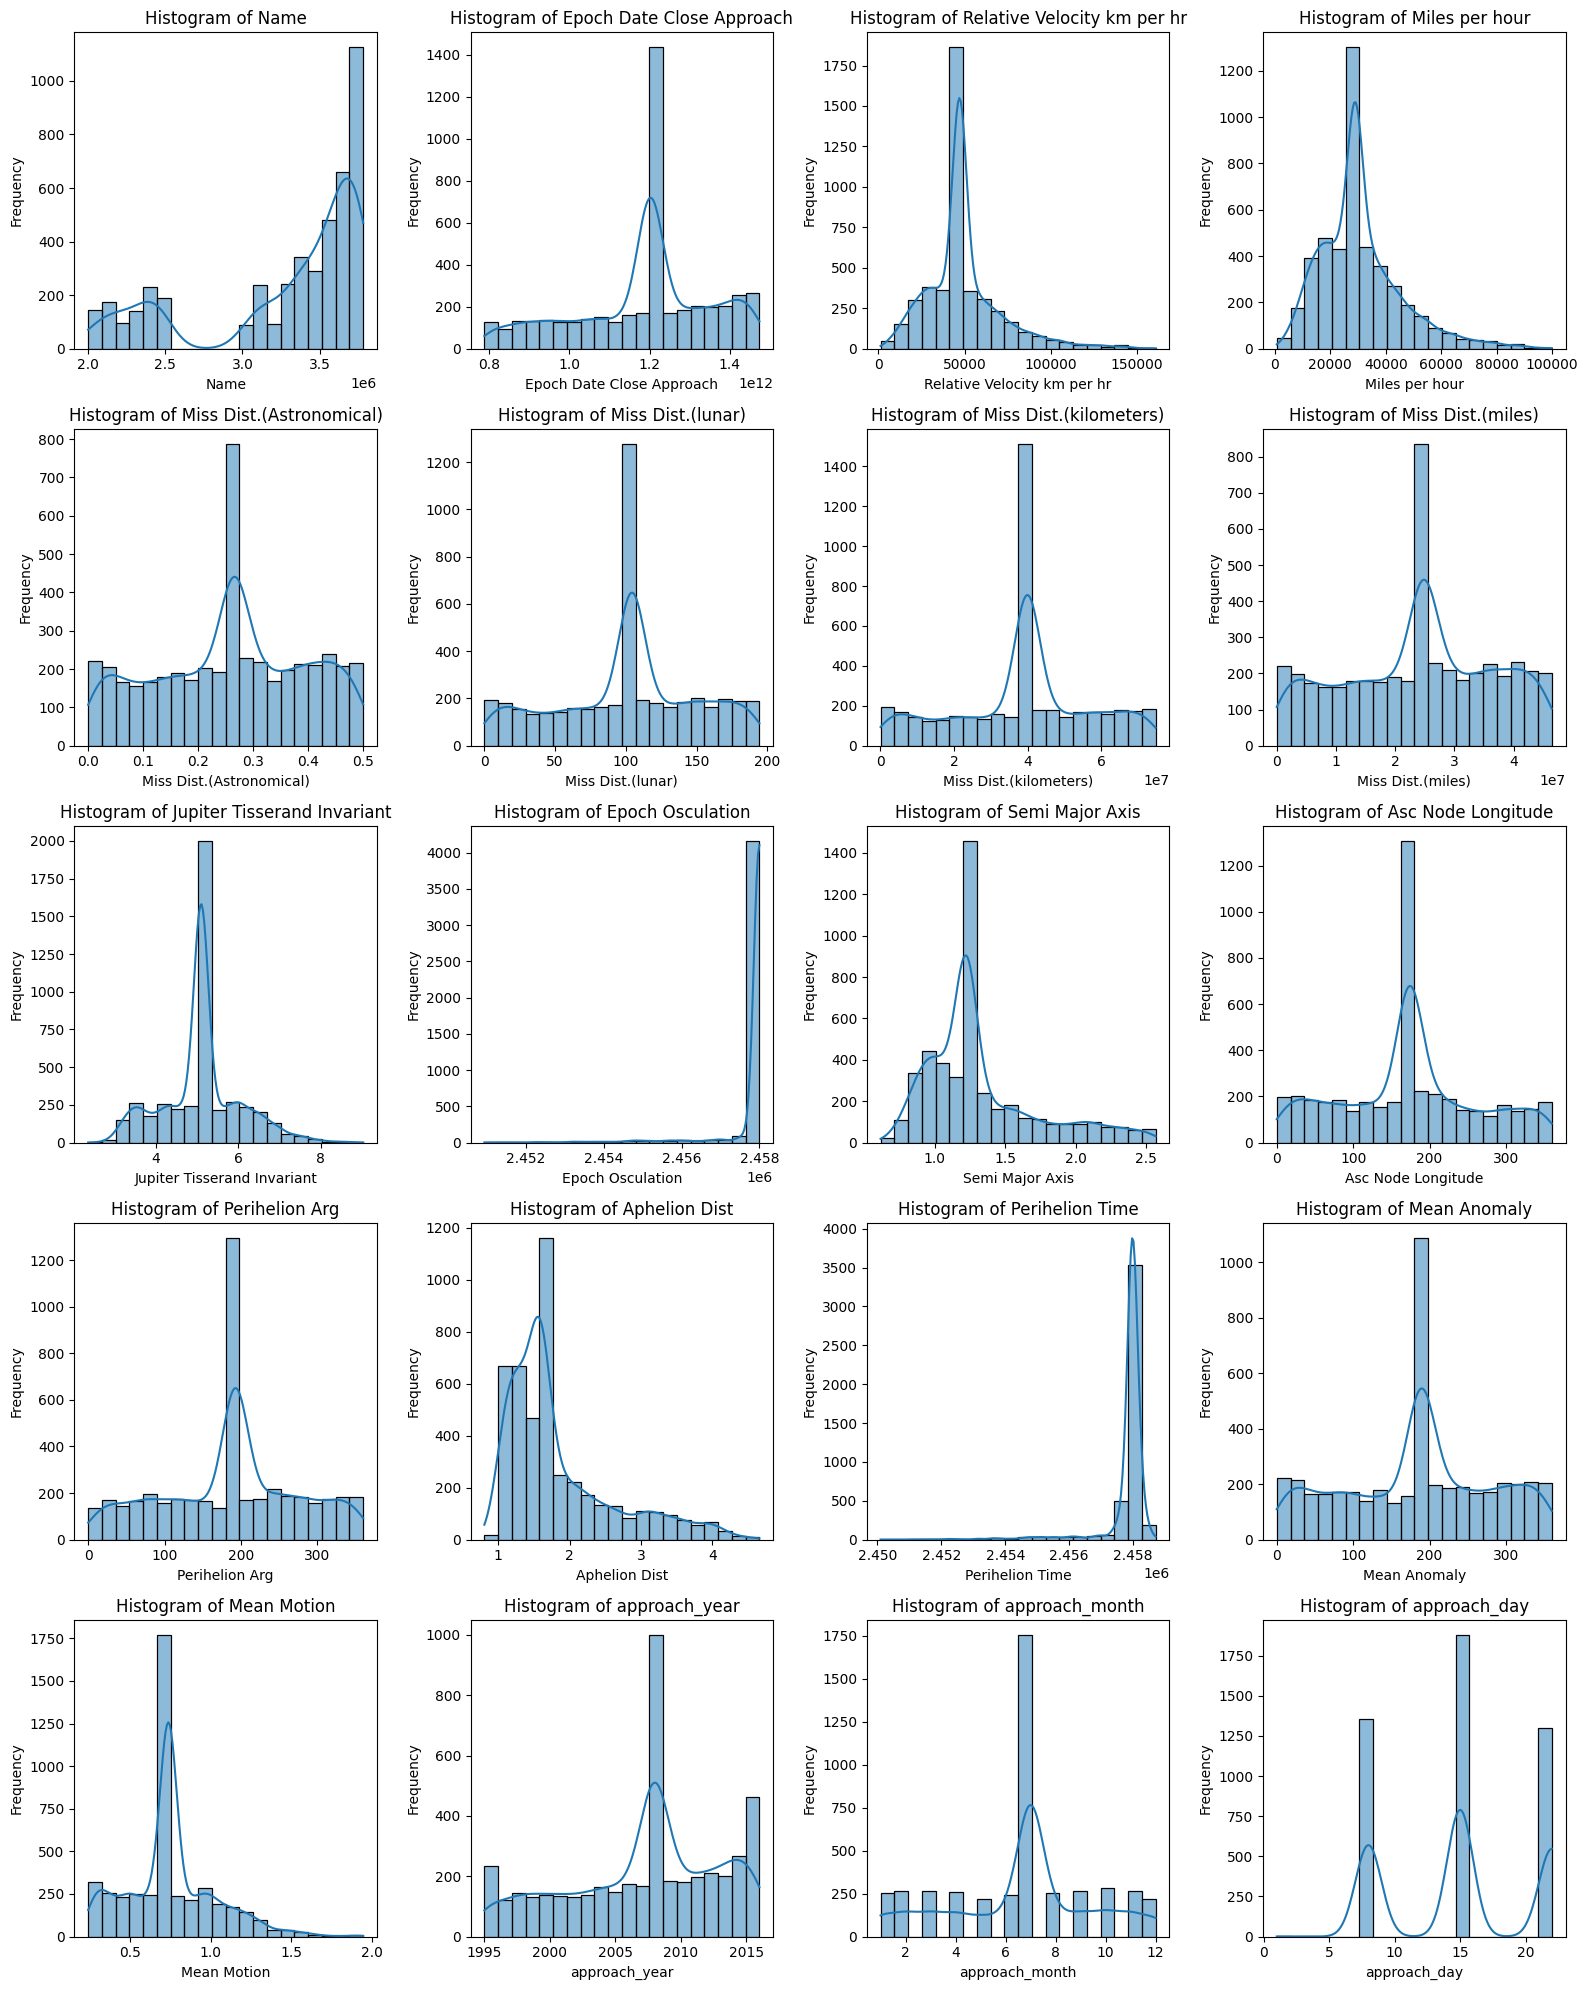

In [21]:
plt.figure(figsize=(16, 20))

# Loop through numerical features and plot histograms
for i, feature in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)  # Create a 5x4 grid to fit 20 plots
    sns.histplot(data[feature], kde=True, bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
from scipy.stats import zscore

z_scores = data[num_cols].apply(zscore)               # compute z-score
outliers = (abs(z_scores) > 3).sum()                # count values where |z| > 3
outliers


Name                             0
Epoch Date Close Approach        0
Relative Velocity km per hr     81
Miles per hour                  71
Miss Dist.(Astronomical)         0
Miss Dist.(lunar)                0
Miss Dist.(kilometers)           0
Miss Dist.(miles)                0
Jupiter Tisserand Invariant     23
Epoch Osculation               143
Semi Major Axis                 22
Asc Node Longitude               0
Perihelion Arg                   0
Aphelion Dist                   39
Perihelion Time                142
Mean Anomaly                     0
Mean Motion                     30
approach_year                    0
approach_month                   0
approach_day                     0
dtype: int64

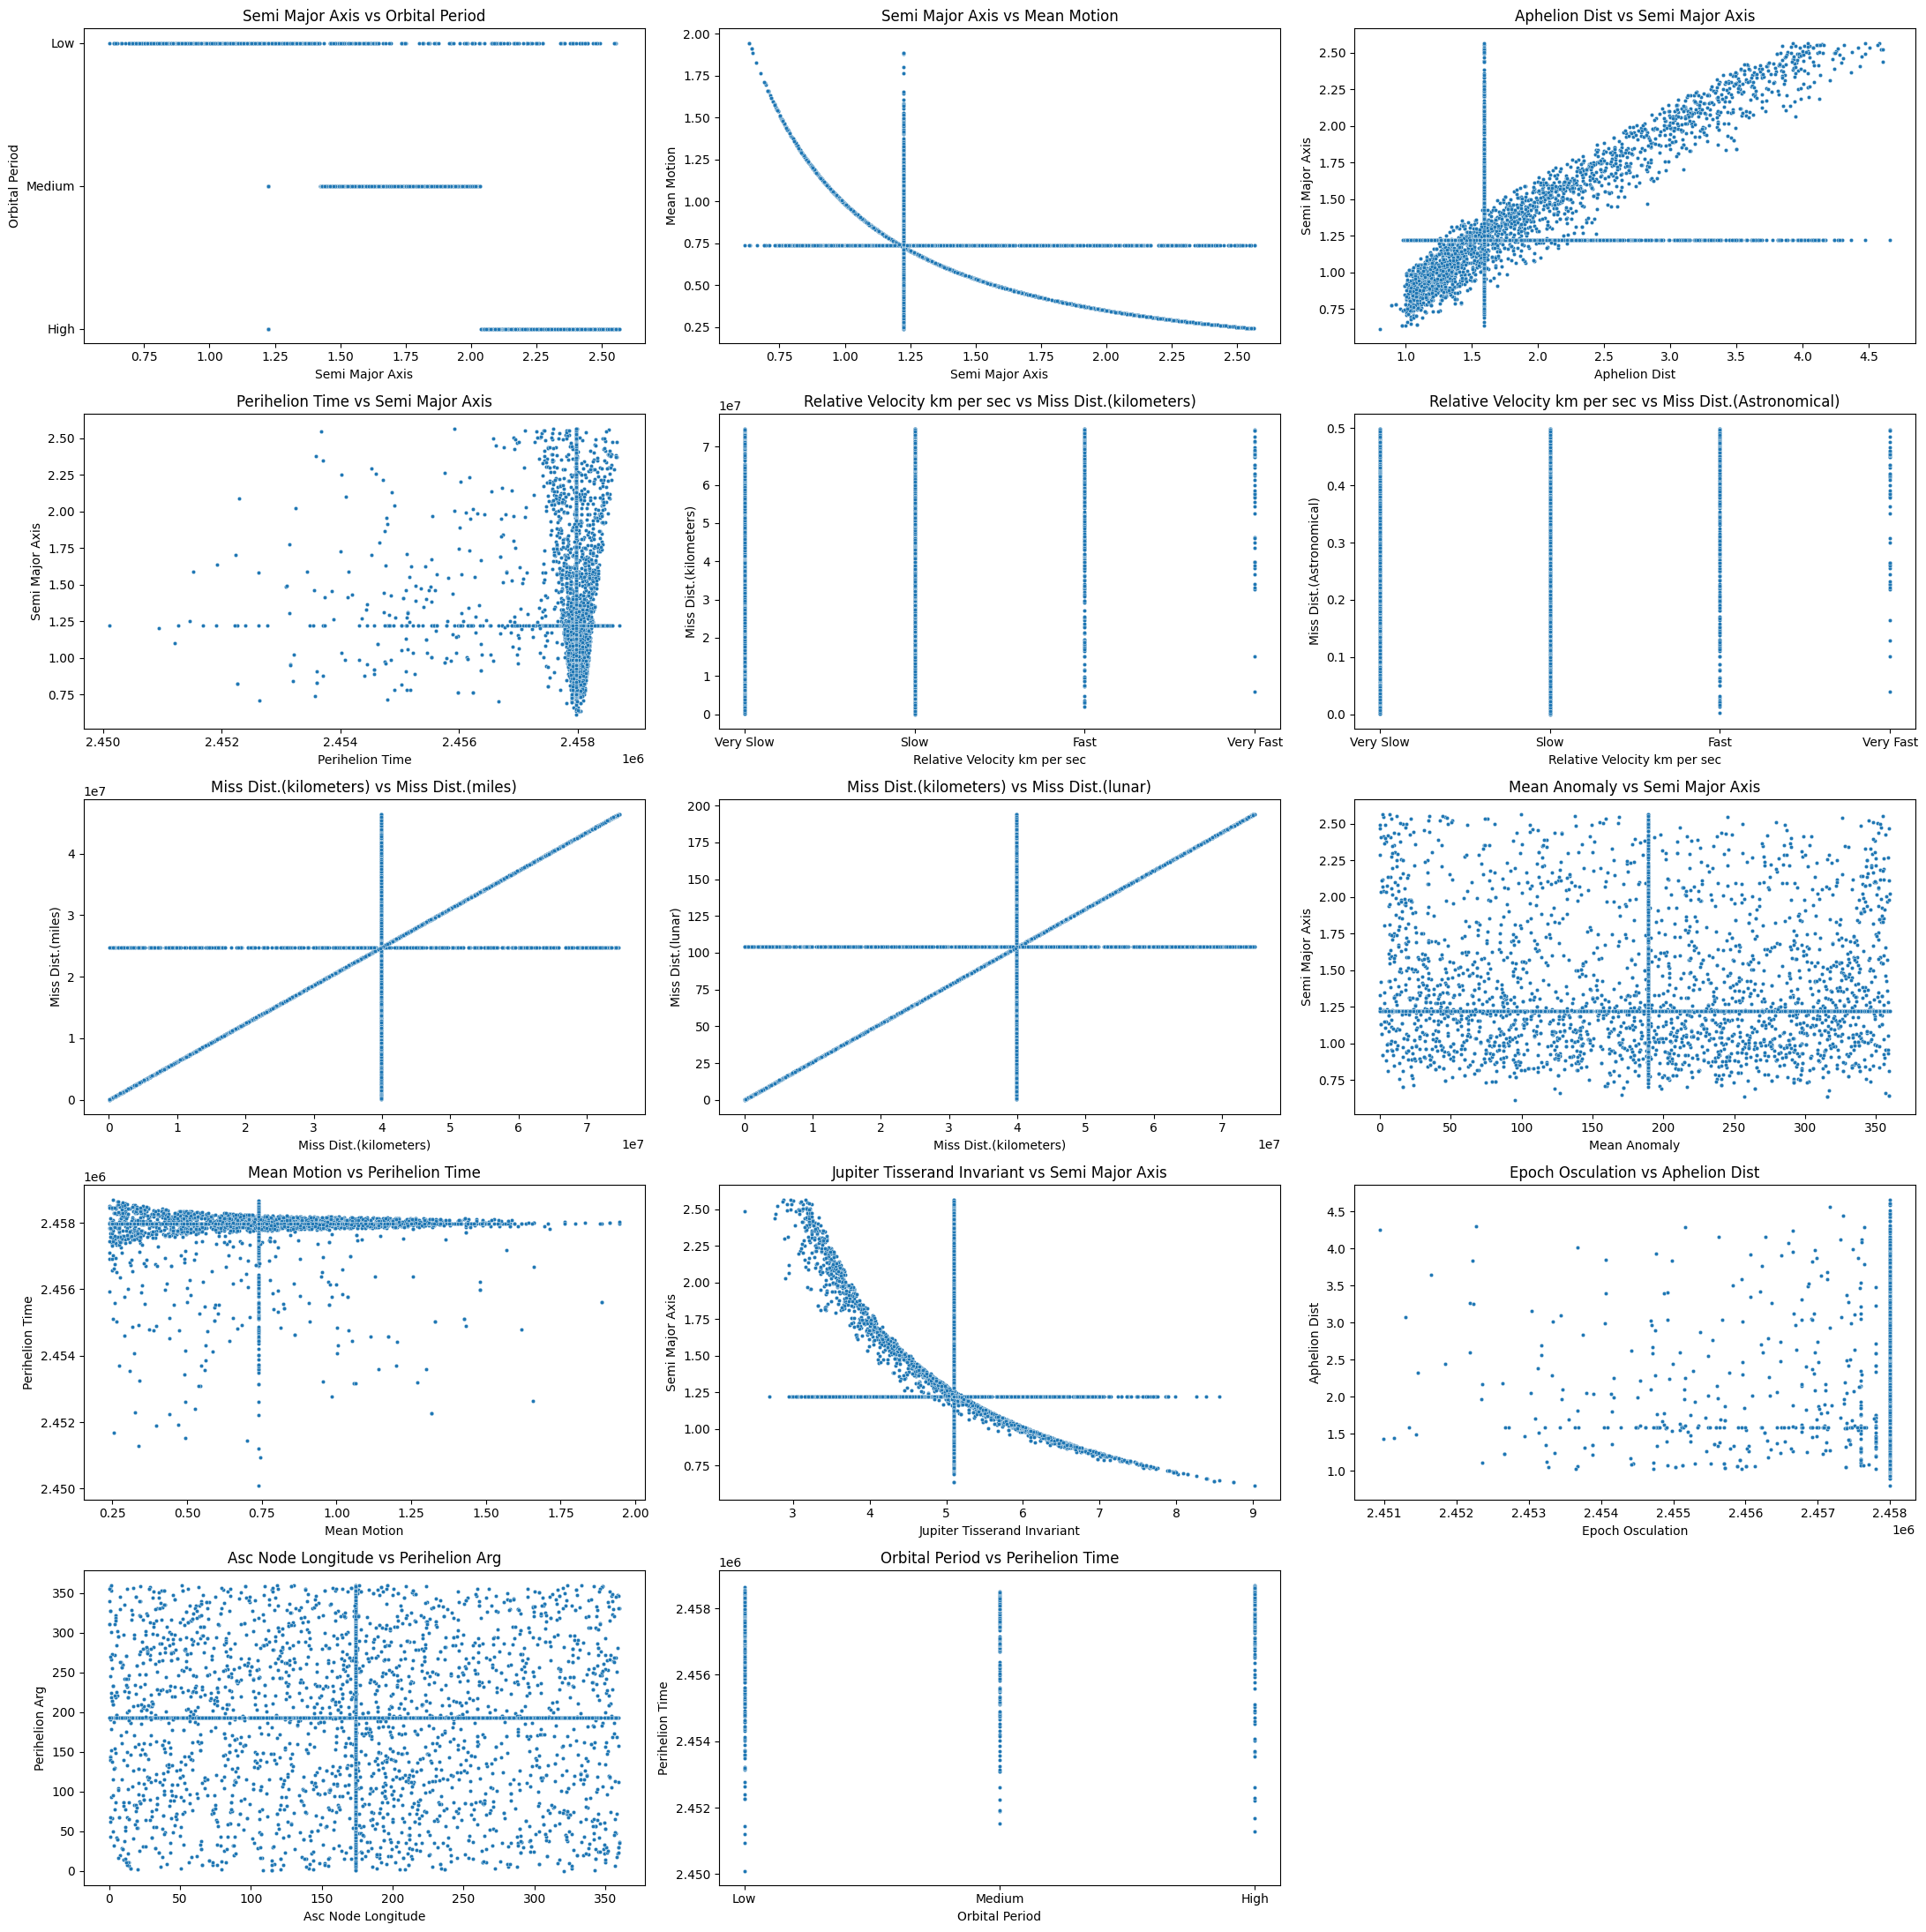

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

pairs = [
    ('Semi Major Axis', 'Orbital Period'),
    ('Semi Major Axis', 'Mean Motion'),
    ('Aphelion Dist', 'Semi Major Axis'),
    ('Perihelion Time', 'Semi Major Axis'),
    ('Relative Velocity km per sec', 'Miss Dist.(kilometers)'),
    ('Relative Velocity km per sec', 'Miss Dist.(Astronomical)'),
    ('Miss Dist.(kilometers)', 'Miss Dist.(miles)'),
    ('Miss Dist.(kilometers)', 'Miss Dist.(lunar)'),
    ('Mean Anomaly', 'Semi Major Axis'),
    ('Mean Motion', 'Perihelion Time'),
    ('Jupiter Tisserand Invariant', 'Semi Major Axis'),
    ('Epoch Osculation', 'Aphelion Dist'),
    ('Asc Node Longitude', 'Perihelion Arg'),
    ('Orbital Period', 'Perihelion Time')
]

plt.figure(figsize=(22, 22))

for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(5, 3, i)  # 5 rows x 3 columns fits 14 plots
    sns.scatterplot(data=data, x=x, y=y, s=10)
    plt.title(f"{x} vs {y}")

plt.tight_layout()
plt.show()


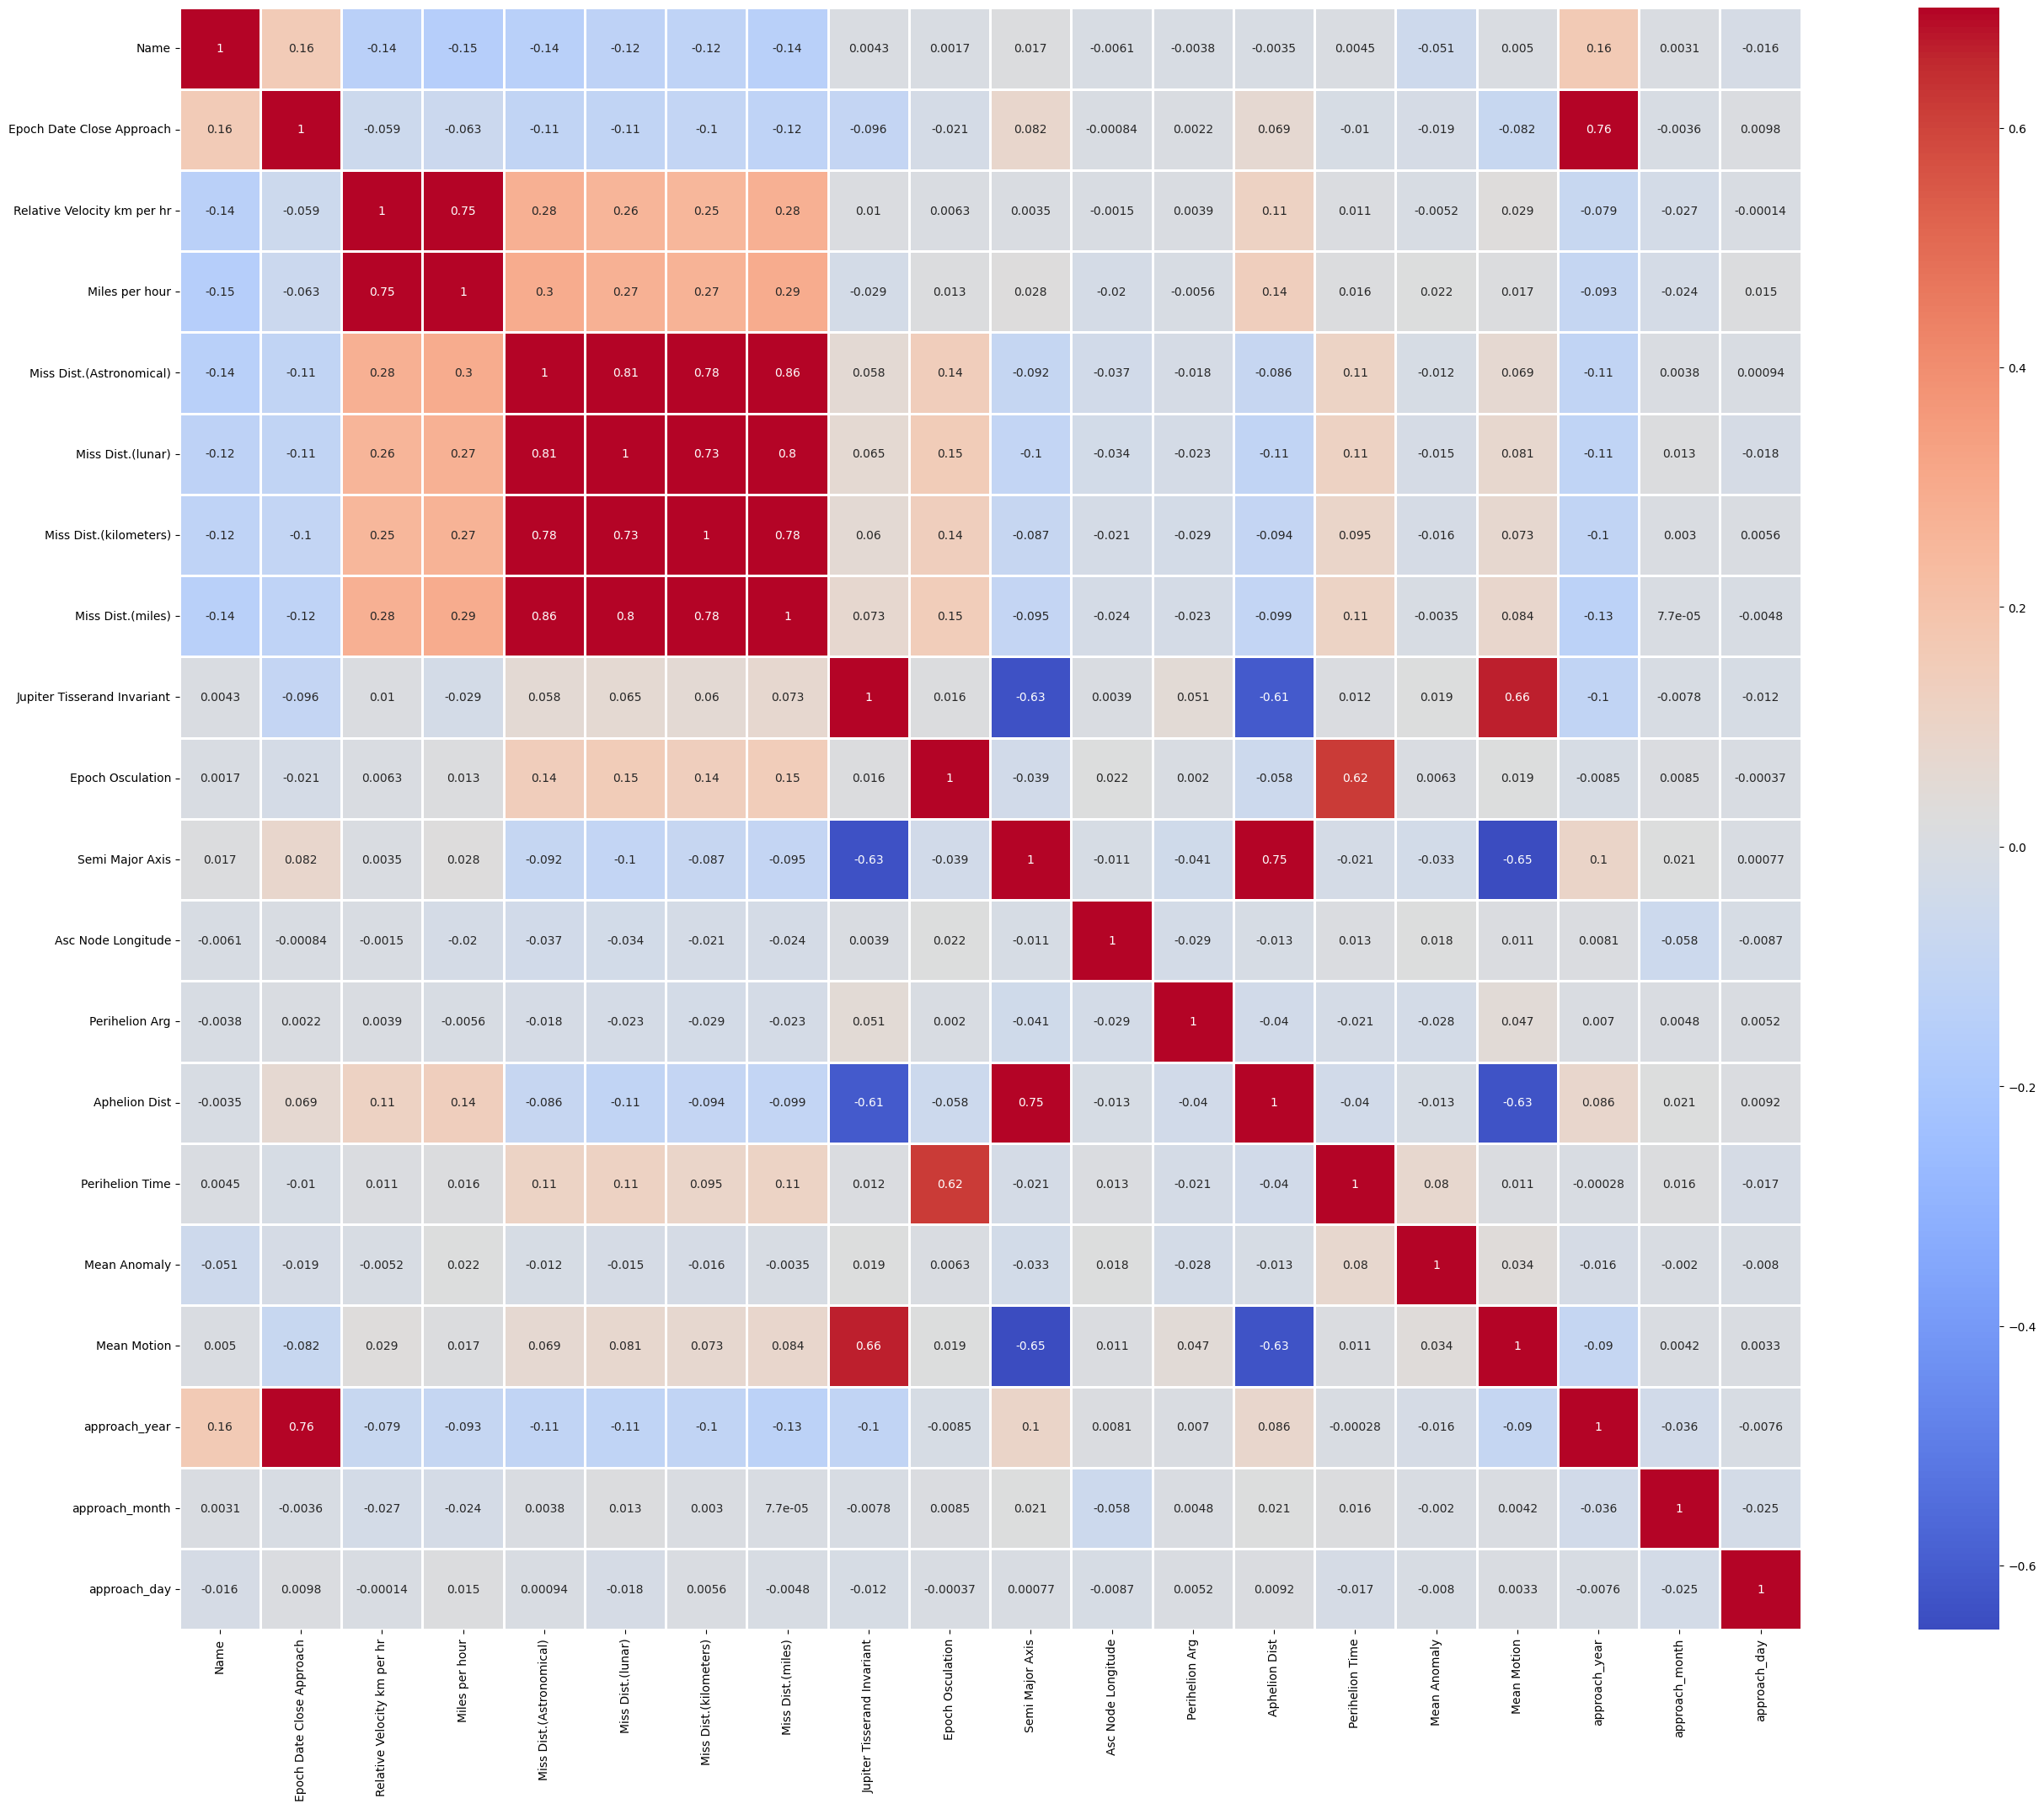

In [24]:
corrmat=data[num_cols].corr()
fig=plt.figure(figsize=(36,25))
sns.heatmap(corrmat, vmax = 0.7, square = True,annot=True,cmap="coolwarm",linewidth=2)
plt.show()

1.3 Visualization

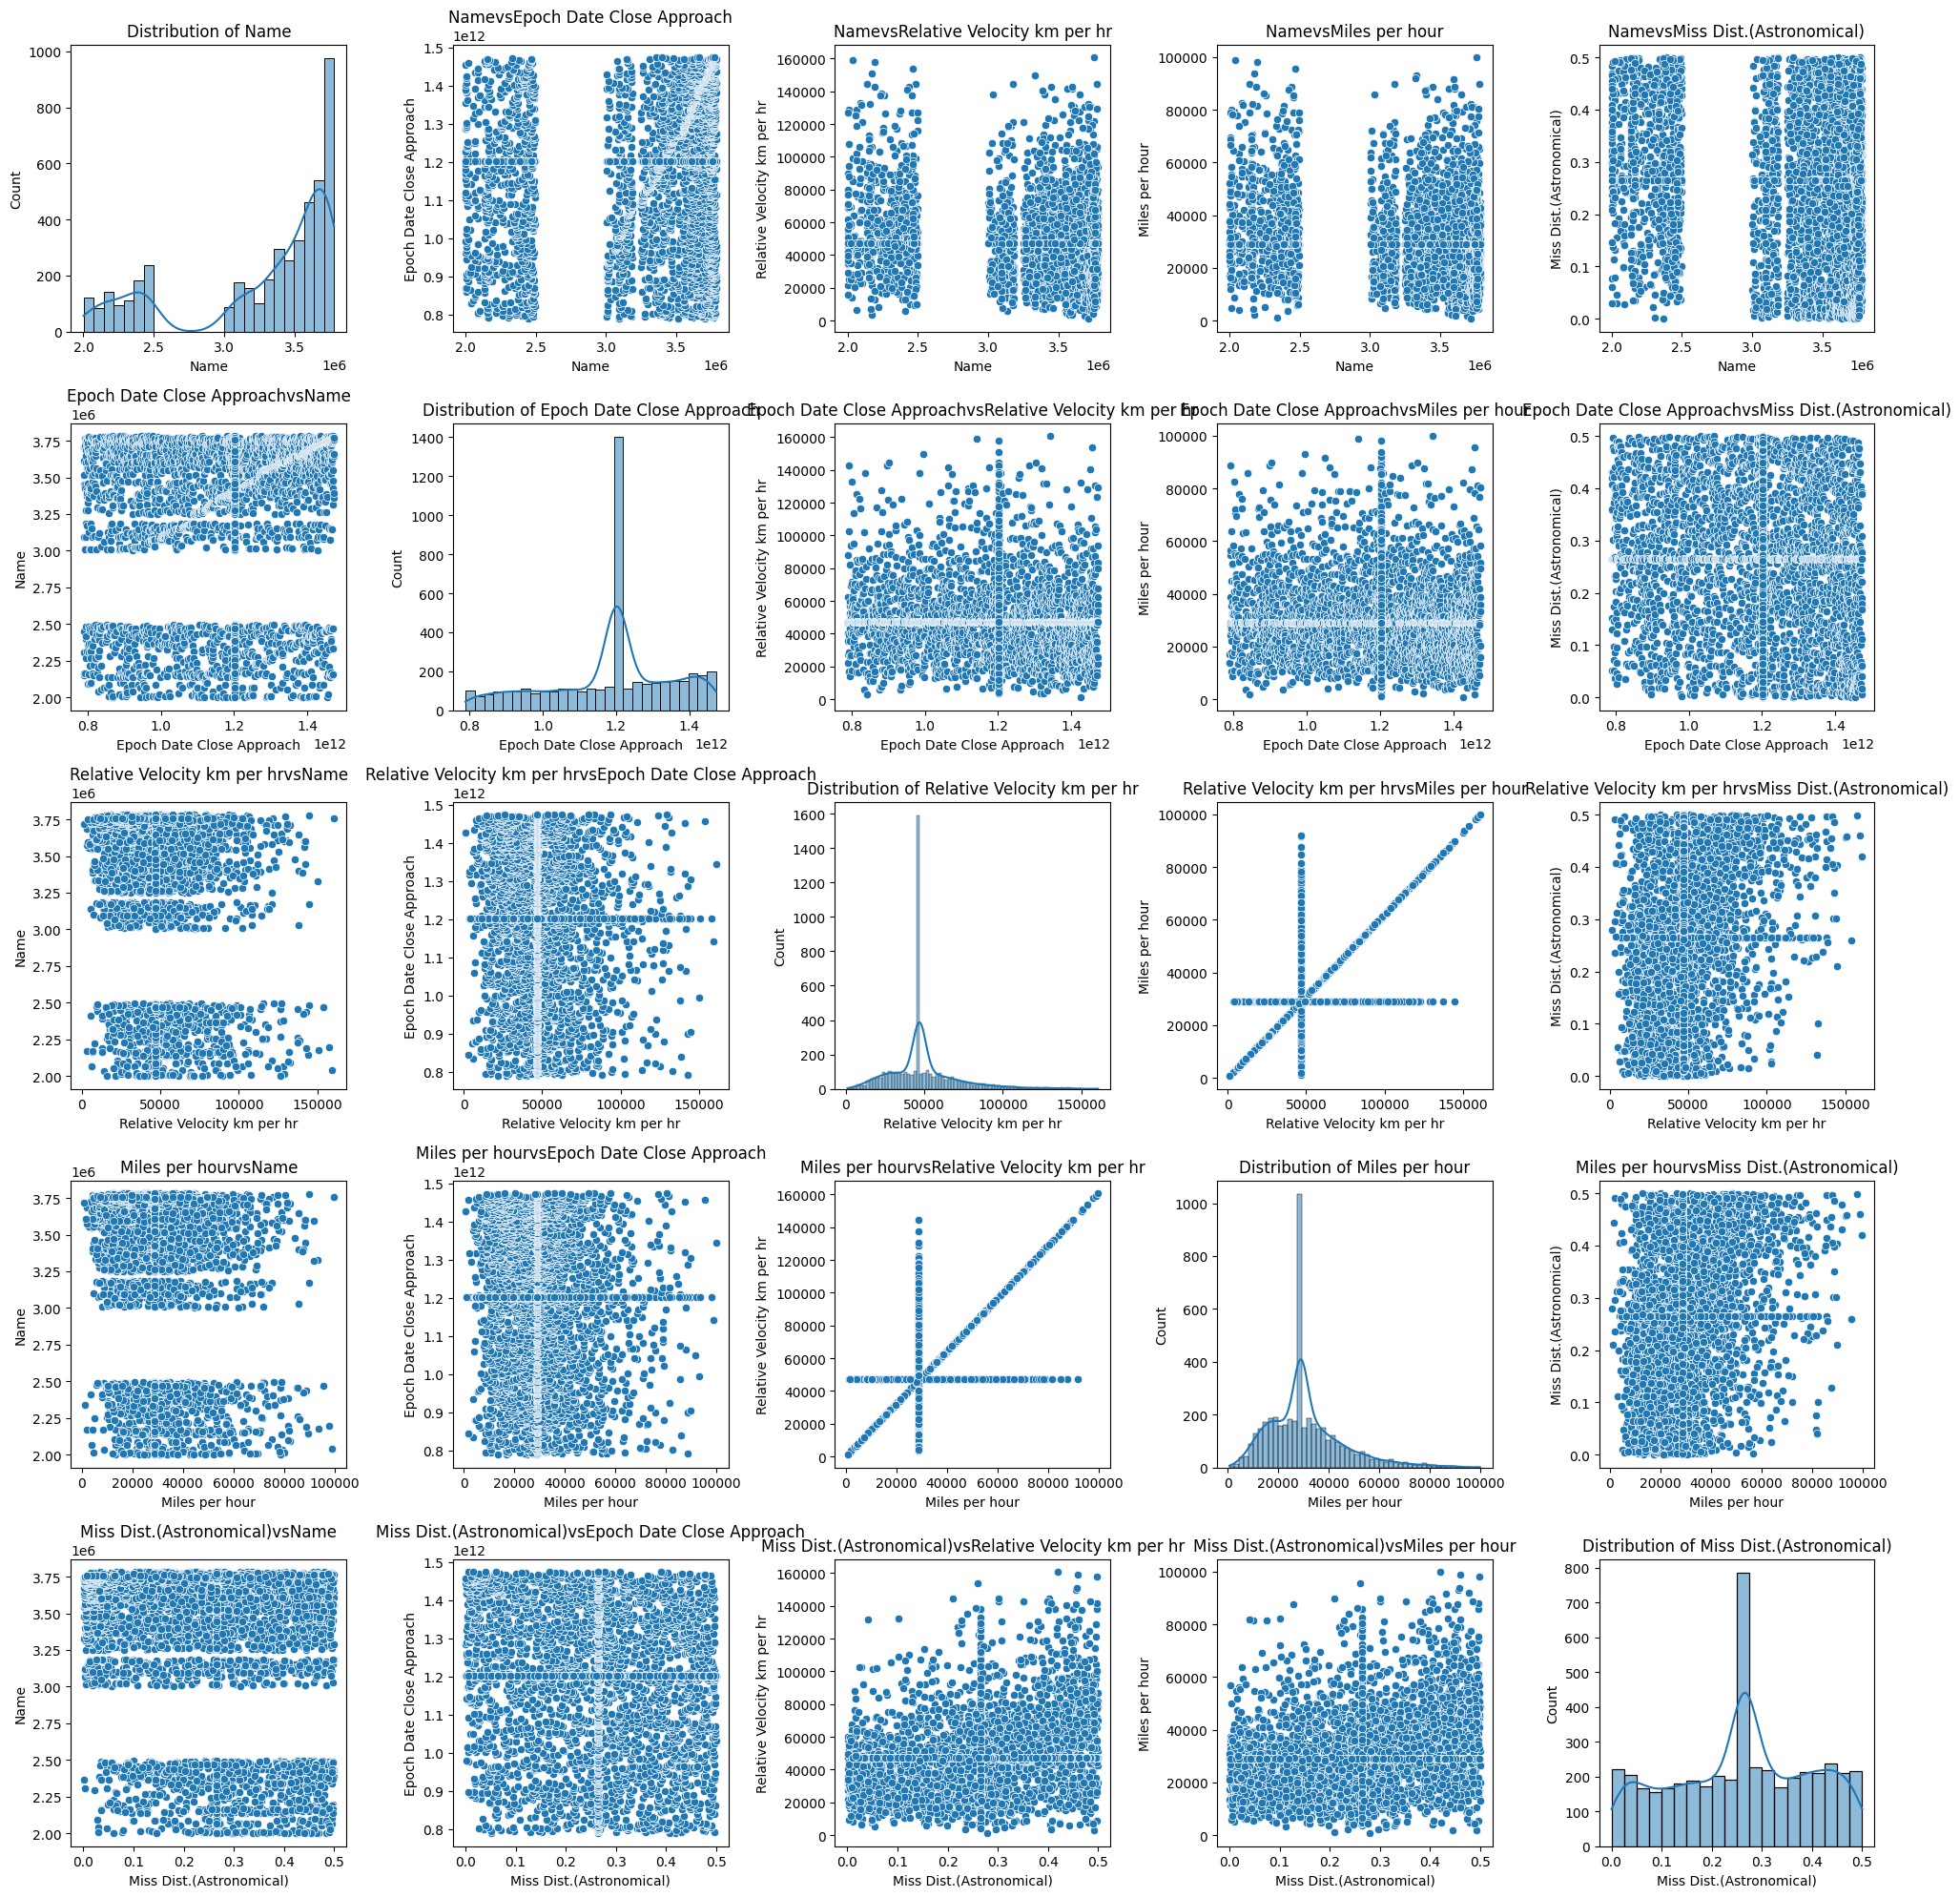

In [25]:
fig, sub_plots = plt.subplots(5,5, figsize=(20, 20))

for i, feature1 in enumerate(num_cols[:5]):
    for j, feature2 in enumerate(num_cols[:5]):
        if i == j:
            # Diagonal plots (histograms)
            sns.histplot(data[feature1],ax=sub_plots[i, j],kde=True)
            sub_plots[i, j].set_title(f'Distribution of {feature1}')
        else:
            # Off-diagonal plots(scatter plots)
            sns.scatterplot(x=data[feature1], y=data[feature2], ax=sub_plots[i, j])
            sub_plots[i,j].set_title(f'{feature1}vs{feature2}')

plt.tight_layout()
plt.show()

📌 What do we infer from the pairplot?

The pairplot reveals several relationships among the numerical features:

Semi Major Axis and Orbital Period show a strong positive relationship, which aligns with Kepler’s 3rd Law—objects farther from the Sun take longer to complete an orbit.

Mean Motion is inversely related to Semi Major Axis, indicating that asteroids with larger orbits move more slowly.

Miss Distance values show wide dispersion, with many outliers, indicating that asteroid approach distances vary significantly.

Relative Velocity does not exhibit strong linear correlation with most orbital parameters, suggesting that approach speed is influenced by multiple physical factors.

📌 How do diagonal and off-diagonal plots differ?

Diagonal Plots (Histograms): These show the distribution of each individual feature. They reveal:

Skewness

Spread

Modal patterns

Outliers Example: Miss distance is highly right-skewed.

Off-Diagonal Plots (Scatterplots): These show relationships between pairs of features. They reveal:

Correlation (positive/negative/none)

Clustering patterns

Trends

Non-linear relationships Example: Semi Major Axis vs Orbital Period forms a clear upward trend.

1.4 Tackling Class Imbalance

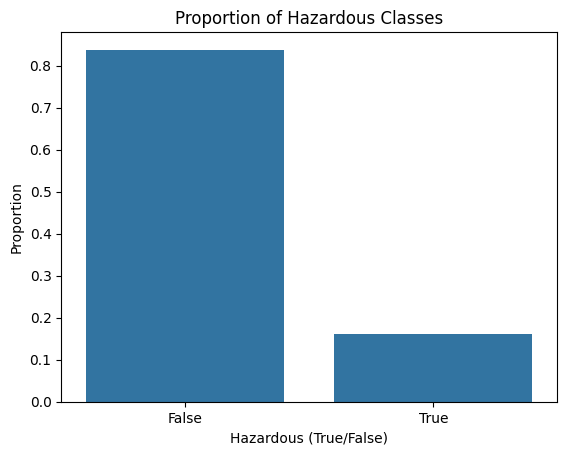

In [26]:
class_counts = data['Hazardous'].value_counts(normalize=True)
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Proportion of Hazardous Classes')
plt.xlabel('Hazardous (True/False)')
plt.ylabel('Proportion')
plt.show()

🎯**How to tackle class imbalance**

There are several effective methods:

1.**Oversampling the Minority Class** (most commonly used)

SMOTE (Synthetic Minority Oversampling Technique) creates synthetic examples of the minority class.

Helps the model learn the patterns of Hazardous asteroids better.

2.**Undersampling the Majority Class**

Randomly remove samples from the majority class.

Useful when dataset is large, but may lose important information.

3.**Using Class Weights**

Most ML models (Logistic Regression, Random Forest, XGBoost) allow assigning more weight to the minority class.

 **Implications of class imbalance on model performance**

Class imbalance can severely harm model performance because the model becomes biased toward predicting the majority class. Even if the model achieves high accuracy, it may completely fail to detect the minority class (Hazardous asteroids). This leads to poor recall, low F1-score, and unreliable predictions.

In the context of asteroid risk:

Missing a Hazardous asteroid is far more dangerous than incorrectly classifying a safe asteroid as hazardous. Therefore, handling class imbalance is essential for building a reliable and safe classifier.

2. Numerical Interpretation and Mathematical Analysis

2.1 Feature Engineering

In [27]:
# Combine year, month, and day into a single 'approach_date' feature
data['approach_date'] = pd.to_datetime({
    'year': data['approach_year'].astype(int),
    'month': data['approach_month'].astype(int),
    'day': data['approach_day'].astype(int)
}, errors='coerce')  # Coerce invalid dates to NaT

data[['approach_year', 'approach_month', 'approach_day', 'approach_date']].head()

approach_year  approach_month  approach_day approach_date
0         2008.0             1.0           1.0    2008-01-01
1         1995.0             1.0           1.0    1995-01-01
2         1995.0             7.0           8.0    1995-07-08
3         1995.0             7.0          15.0    1995-07-15
4         2008.0             7.0          15.0    2008-07-15

In [28]:
# Calculate the ratio of 'Miss Dist.(kilometers)' to 'Semi Major Axis'
data['miss_distance_ratio'] = data['Miss Dist.(Astronomical)'] / data['Semi Major Axis']
data["miss_distance_ratio"].head()

0    0.298137
1    0.239471
2    0.034930
3    0.216812
4    0.332757
Name: miss_distance_ratio, dtype: float64

In [29]:
data['Epoch Date Close Approach'] = pd.to_datetime(data['Epoch Date Close Approach'])

# Get the current date as a pandas Timestamp
current_date = pd.Timestamp(datetime.now())

# Calculate 'Time Until Approach' as the difference in days between 'Epoch Date Close Approach' and the current date
data['Time Until Approach'] = (data['Epoch Date Close Approach'] - current_date)
data['Time Until Approach'].head()

0   -20434 days +19:57:27.770031
1   -20434 days +20:04:21.280431
2   -20434 days +19:57:28.374831
3   -20434 days +19:57:28.979631
4   -20434 days +19:57:28.979631
Name: Time Until Approach, dtype: timedelta64[ns]

In [30]:
data=data.copy()

In [31]:
# Constants
G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2
M_earth = 5.972e24  # mass of Earth in kg
mu = G * M_earth  # standard gravitational parameter for Earth
AU_to_m = 1.496e11


# Calculate orbital period (T) using Kepler's Third Law
data['orbital_period(in sec)'] = 2 * np.pi * np.sqrt(((data['Semi Major Axis']* AU_to_m) ** 3) / mu)  # in seconds


# Calculate average orbital velocity (v)
data['average_orbital_velocity(in m/s)'] = (2 * np.pi * (data['Semi Major Axis']* AU_to_m)) / data['orbital_period(in sec)']  # in m/s

# Calculate Eccentricity and perihelion distance
data["perihelion"]=((2*data["Semi Major Axis"])-((data["Aphelion Dist"]))) # in Au
data['eccentricity'] = ((data['Aphelion Dist'] - data['perihelion'])) / ((data['Aphelion Dist'] + data['perihelion']))  # calculating eccentricity

data[[ 'orbital_period(in sec)', 'average_orbital_velocity(in m/s)',"eccentricity"]].head()

orbital_period(in sec)  average_orbital_velocity(in m/s)  eccentricity
0            3.039211e+10                         43.515920      0.425549
1            2.123207e+10                         49.042319      0.351674
2            3.208624e+10                         42.736165      0.348248
3            2.464607e+10                         46.664423      0.248746
4            2.470845e+10                         46.625122      0.297312

In [32]:
G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2
M_sun = 1.989e30  # mass of the Sun in kg
AU_to_m = 1.496e11 # in meters

# Calculate heliocentric distance (assumed to be the semi-major axis in meters)
data['heliocentric_distance(in m)'] = (data['Semi Major Axis'] * AU_to_m)  # convert from AU to meters

# Calculate escape velocity (v_e)
data['escape_velocity(in m/s)'] = np.sqrt((2 * G * M_sun) / data['heliocentric_distance(in m)']) # in m/s

# Calculate specific orbital energy (ε)
data['specific_orbital_energy(in J/Kg)'] = - (G * M_sun) / (2 * data['heliocentric_distance(in m)']) # in J/Kg

(data[[ 'heliocentric_distance(in m)', 'escape_velocity(in m/s)', 'specific_orbital_energy(in J/Kg)']].head())

heliocentric_distance(in m)  escape_velocity(in m/s)  \
0                 2.104889e+11             35515.723102   
1                 1.657233e+11             40026.119481   
2                 2.182400e+11             34879.321837   
3                 1.830433e+11             38085.388604   
4                 1.833520e+11             38053.312476   

   specific_orbital_energy(in J/Kg)  
0                     -3.153416e+08  
1                     -4.005226e+08  
2                     -3.041418e+08  
3                     -3.626242e+08  
4                     -3.620136e+08

In [33]:
# Calculate the specific angular momentum (h)
data['specific_angular_momentum(in m^2/s)'] = np.sqrt((((G * M_sun) * (data['heliocentric_distance(in m)'])) * (1 - (data['eccentricity'] * data['eccentricity']))))
data['specific_angular_momentum(in m^2/s)'].head()

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0    4.783573e+15
1    4.390810e+15
2    5.045608e+15
3    4.774497e+15
4    4.710495e+15
Name: specific_angular_momentum(in m^2/s), dtype: float64

In [34]:
threshold = 0.5

In [35]:
# Calculate velocity at perihelion (v_p) and aphelion (v_a) using the Vis-Viva equation
data['velocity_perihelion(in m/s)'] = np.sqrt((G * M_sun) * ((2 / ((data['perihelion'])* AU_to_m)) - ((1 / ((data['Semi Major Axis'])* AU_to_m))))) # in m/s
data['velocity_aphelion(in m/s)'] = np.sqrt((G * M_sun) * ((2 / (data['Aphelion Dist']* AU_to_m)) - (1 / (data['Semi Major Axis']* AU_to_m)))) # in m/s


additional_features = ['specific_angular_momentum(in m^2/s)', 'velocity_perihelion(in m/s)', 'velocity_aphelion(in m/s)']
# Calculate skewness for the additional features
additional_skewness = data[additional_features].skew()
# Fill missing values based on skewness
for feature in additional_features:
    if abs(additional_skewness[feature]) > threshold:
        # If skewed, fill missing values with median
        data[feature] = data[feature].fillna(data[feature].median())
    else:
        # If not skewed, fill missing values with mean
        data[feature] = data[feature].fillna(data[feature].mean())

data[['velocity_perihelion(in m/s)', 'velocity_aphelion(in m/s)']].head()

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


velocity_perihelion(in m/s)  velocity_aphelion(in m/s)
0                 39561.275719               15941.935195
1                 40866.543004               19601.489665
2                 35472.914321               17147.831171
3                 34720.574747               20888.145367
4                 36561.028290               19803.253056

In [36]:
closest_approach_distance_Au=data['Miss Dist.(Astronomical)'].mean()
closest_approach_distance_lunar=data['Miss Dist.(lunar)'].mean()
closest_approach_distance_km=data['Miss Dist.(kilometers)'].mean()
closest_approach_distance_miles=data['Miss Dist.(miles)'].mean()
print(closest_approach_distance_Au)
print(closest_approach_distance_lunar)
print(closest_approach_distance_km)
print(closest_approach_distance_miles)

0.25915679958354654
101.58485067346835
38863290.416995205
24034427.727310322


In [37]:
# Constants
T_earth = 365.25*24*60*60  # Orbital period of Earth in sec
# Calculate Mean Motion
data['mean_motion(in rad/s)'] = 2 * ((np.pi) / (data['orbital_period(in sec)']))  # Mean motion in radians per sec

# Calculate Synodic Period
data['synodic_period(in sec)'] = 1 / (abs((1 / data['orbital_period(in sec)']) - (1 / T_earth)))  # Synodic period in sec

data[['mean_motion(in rad/s)', 'synodic_period(in sec)']].head()

mean_motion(in rad/s)  synodic_period(in sec)
0           2.067374e-10            3.159040e+07
1           2.959290e-10            3.160457e+07
2           1.958218e-10            3.158867e+07
3           2.549366e-10            3.159806e+07
4           2.542930e-10            3.159796e+07

2.2 Additional Features

**1) RISK SCORE :  A simple risk score can be weighted based on how close and how fast the object is:**

In [38]:
a=(1/3600)
# Normalize miss distance and relative velocity (scaling them for better comparison)
data['Normalized Miss Distance'] = (data["Miss Dist.(kilometers)"] - data["Miss Dist.(kilometers)"].min()) / (data["Miss Dist.(kilometers)"].max() - data["Miss Dist.(kilometers)"].min())
data['Normalized Velocity'] = ((data["Relative Velocity km per hr"]* a) - (data["Relative Velocity km per hr"].min() * a)) / (((data["Relative Velocity km per hr"].max())* a) - ((data["Relative Velocity km per hr"].min())* a))

# Risk score based on normalized miss distance, velocity, and hazardous status
data['Risk Score'] = (data['Normalized Velocity'] + (1 - data['Normalized Miss Distance'])) * data['Hazardous']

data.drop(columns=["Normalized Miss Distance","Normalized Velocity"],inplace=True)
data.drop(columns=["perihelion"],inplace=True)
data["Risk Score"].head()

0    0.291384
1    0.000000
2    1.062165
3    0.000000
4    0.398788
Name: Risk Score, dtype: float64

**2)  Close Approach Indicator: If the asteroid is within the threshold distance then it is classified as 1.**

In [39]:
# Close approach indicator (1 if the object comes within a certain distance, 0 otherwise)
threshold_distance = 1e6  # Example threshold (in km)
data['Close Approach'] = data["Miss Dist.(kilometers)"].apply(lambda x: 1 if x < threshold_distance else 0)

data["Close Approach"].head()

0    0
1    0
2    0
3    0
4    0
Name: Close Approach, dtype: int64

**3) Orbital Stability Score Orbital stability score measures the likelihood that an asteroid remains stable under perturbations or during dynamic simulations in its orbit.**

In [40]:
# Orbital stability score (0 for unstable, 1 for stable)
stability_threshold = 3 # Example threshold for stability
data['Orbital Stability'] = data['Jupiter Tisserand Invariant'].apply(lambda x: 0 if x < stability_threshold else 1)
data["Orbital Stability"].head()

0    1
1    1
2    1
3    1
4    1
Name: Orbital Stability, dtype: int64

**3. Handling Binned Values**

In [41]:
data['Relative Velocity km per sec'].value_counts()

Relative Velocity km per sec
Slow         2805
Very Slow    1319
Fast          353
Very Fast      57
Name: count, dtype: int64

In [42]:
ord1={'Very Slow':0,'Slow':1,'Fast':2,'Very Fast':3}
data['Relative Velocity km per sec'] = data['Relative Velocity km per sec'].map(ord1)
data['Relative Velocity km per sec'].head()

0    0
1    1
2    1
3    0
4    0
Name: Relative Velocity km per sec, dtype: int64

In [43]:
data['Orbital Period'].value_counts()

Orbital Period
Low       3135
Medium     917
High       482
Name: count, dtype: int64

In [44]:
ord2={'Low':0,'Medium':1,'High':2}
data['Orbital Period'] = data['Orbital Period'].map(ord2)
data['Orbital Period'].head()

0    0
1    0
2    1
3    0
4    0
Name: Orbital Period, dtype: int64

In [45]:
data['Orbit Uncertainity'].value_counts()

Orbit Uncertainity
Low       3214
High       671
Medium     649
Name: count, dtype: int64

In [46]:
ord3={'Low':0,'Medium':1,'High':2}
data['Orbit Uncertainity'] = data['Orbit Uncertainity'].map(ord3)
data['Orbit Uncertainity'].head()

0    1
1    0
2    0
3    1
4    0
Name: Orbit Uncertainity, dtype: int64

In [47]:
data['Hazardous'] = data['Hazardous'].astype(int)
data['Hazardous'].head()

0    1
1    0
2    1
3    0
4    1
Name: Hazardous, dtype: int64

**4. HazardousClassification**

In [50]:
X=data.copy()
X.drop(columns=['Relative Velocity km per hr','Miles per hour','Miss Dist.(lunar)','Miss Dist.(kilometers)', 'Miss Dist.(miles)','Epoch Osculation','Perihelion Time','approach_year',
       'approach_month', 'approach_day','approach_date','Hazardous',"Name","Time Until Approach","Epoch Date Close Approach","Perihelion Arg","Asc Node Longitude","Mean Motion","eccentricity","Orbit Uncertainity","Risk Score"], inplace=True)
y=data['Hazardous']

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# class imbalance handling
pos = y_train.sum()
neg = len(y_train) - pos
scale = neg / pos

model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale,
    random_state=42
)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [53]:
y_pred = model.predict(X_test)


In [54]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88       768
           1       0.37      0.43      0.40       139

    accuracy                           0.80       907
   macro avg       0.63      0.65      0.64       907
weighted avg       0.81      0.80      0.80       907

[[664 104]
 [ 79  60]]


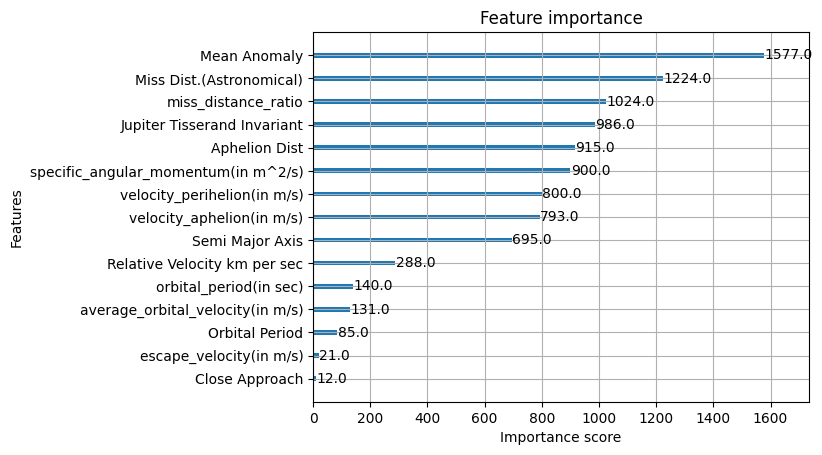

In [55]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model, max_num_features=15)
plt.show()


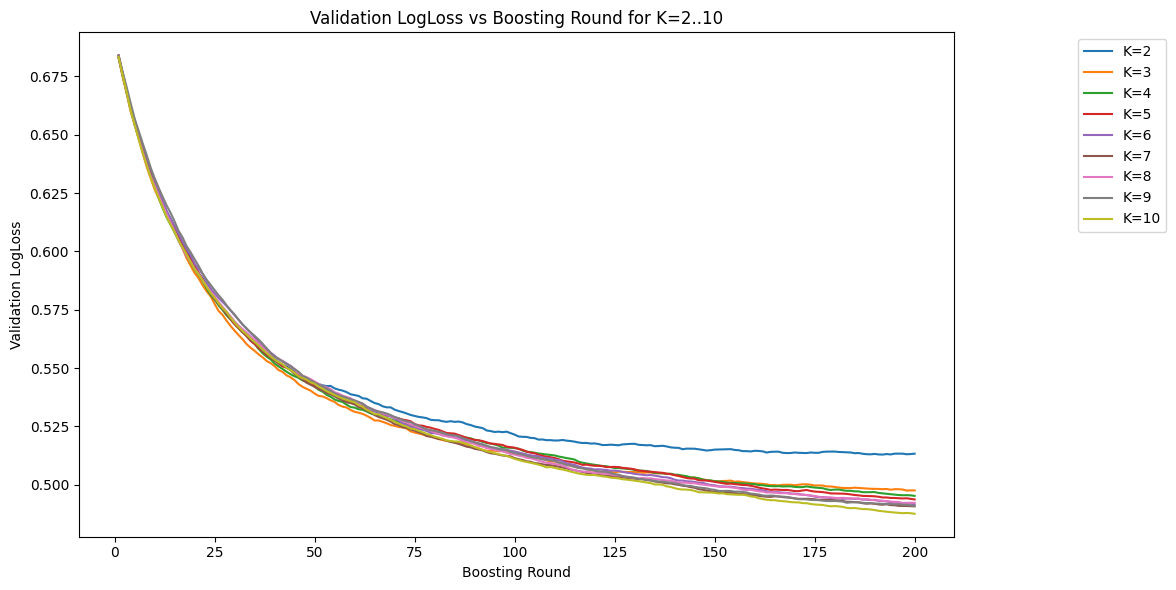

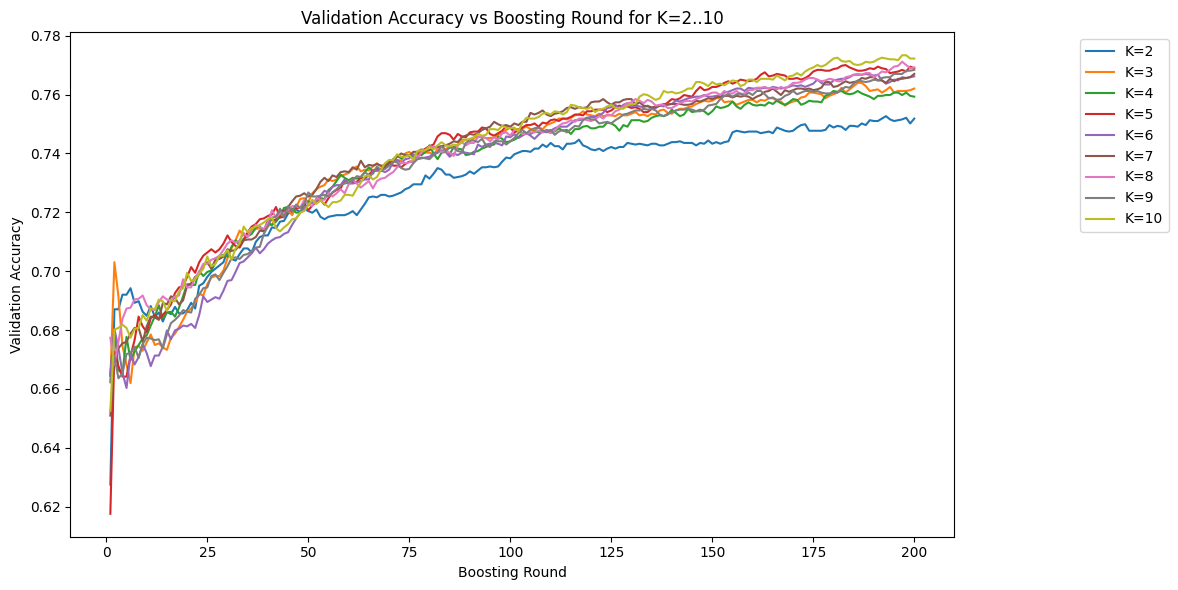

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

X = data.copy()
X.drop(columns=[
    'Relative Velocity km per hr','Miles per hour','Miss Dist.(lunar)',
    'Miss Dist.(kilometers)', 'Miss Dist.(miles)','Epoch Osculation',
    'Perihelion Time','approach_year','approach_month', 'approach_day',
    'approach_date','Hazardous',"Name","Time Until Approach",
    "Epoch Date Close Approach","Perihelion Arg","Asc Node Longitude",
    "Mean Motion","eccentricity","Orbit Uncertainity","Risk Score"
], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

n_rounds = 200
ks = range(2, 11)
avg_logloss_by_k = {}
avg_accuracy_by_k = {}

for K in ks:
    skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)
    fold_logloss = []
    fold_error = []
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        sm = SMOTE(random_state=42)
        X_tr_res, y_tr_res = sm.fit_resample(X_tr, y_tr)
        model = XGBClassifier(
            n_estimators=n_rounds,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            objective='binary:logistic',
            eval_metric=['logloss','error'],
            use_label_encoder=False,
            random_state=42
        )
        model.fit(X_tr_res, y_tr_res, eval_set=[(X_tr_res, y_tr_res), (X_val, y_val)], verbose=False)
        res = model.evals_result()

        train_log = res['validation_0']['logloss']
        val_log = res['validation_1']['logloss']
        train_err = res['validation_0']['error']
        val_err = res['validation_1']['error']
        if len(val_log) < n_rounds:
            pad = n_rounds - len(val_log)
            val_log = val_log + [val_log[-1]]*pad
            val_err = val_err + [val_err[-1]]*pad
        fold_logloss.append(val_log)
        fold_error.append(val_err)
    mean_logloss = np.mean(fold_logloss, axis=0)
    mean_error = np.mean(fold_error, axis=0)
    avg_logloss_by_k[K] = mean_logloss
    avg_accuracy_by_k[K] = 1.0 - mean_error

plt.figure(figsize=(12,6))
for K in ks:
    plt.plot(range(1, n_rounds+1), avg_logloss_by_k[K], label=f'K={K}')
plt.xlabel('Boosting Round')
plt.ylabel('Validation LogLoss')
plt.title('Validation LogLoss vs Boosting Round for K=2..10')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
for K in ks:
    plt.plot(range(1, n_rounds+1), avg_accuracy_by_k[K], label=f'K={K}')
plt.xlabel('Boosting Round')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Boosting Round for K=2..10')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))
plt.tight_layout()
plt.show()


📌 **Summary of K-Fold Cross-Validation Results**

We trained XGBoost using Stratified K-Fold Cross-Validation for values of K ranging from 2 to 10.
The LogLoss curves show how the model stabilizes as the number of boosting rounds increases.
Higher values of K generally provide smoother validation curves because the validation set becomes smaller and more stable across folds.
The accuracy curves show consistent improvement across boosting rounds, with optimal performance achieved around ~150–200 rounds.
This analysis helps select the ideal number of boosting rounds and evaluate how model performance varies with different K values.

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

search = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best Parameters:", search.best_params_)
best_model = search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}


In [62]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]


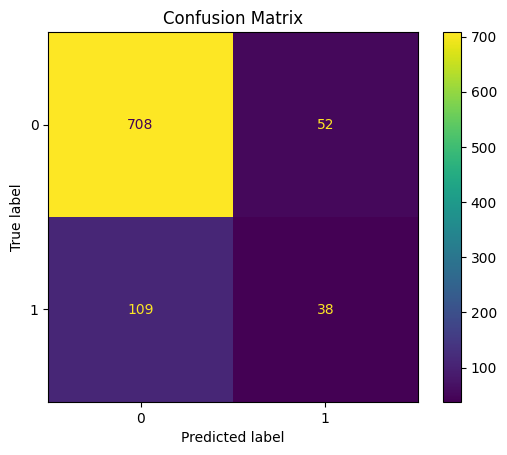

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


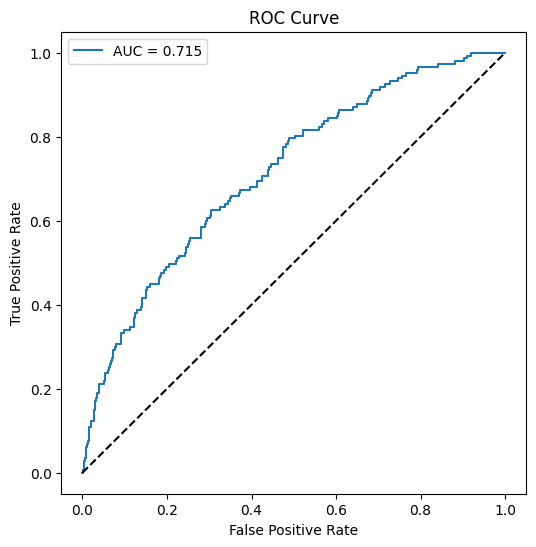

In [64]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


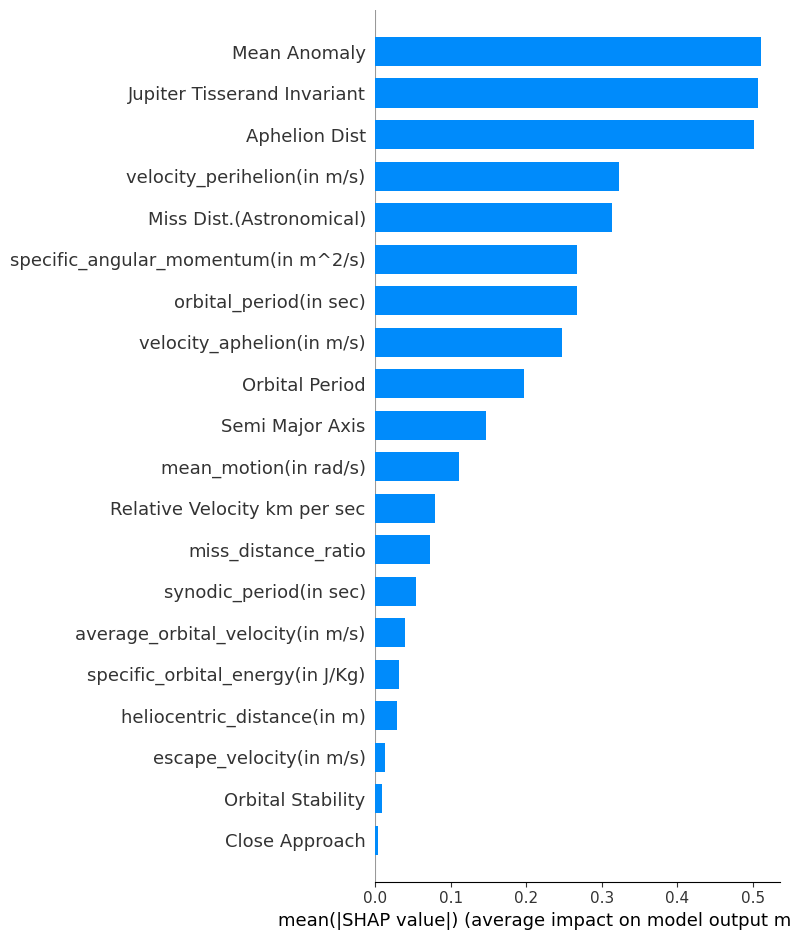

In [67]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")



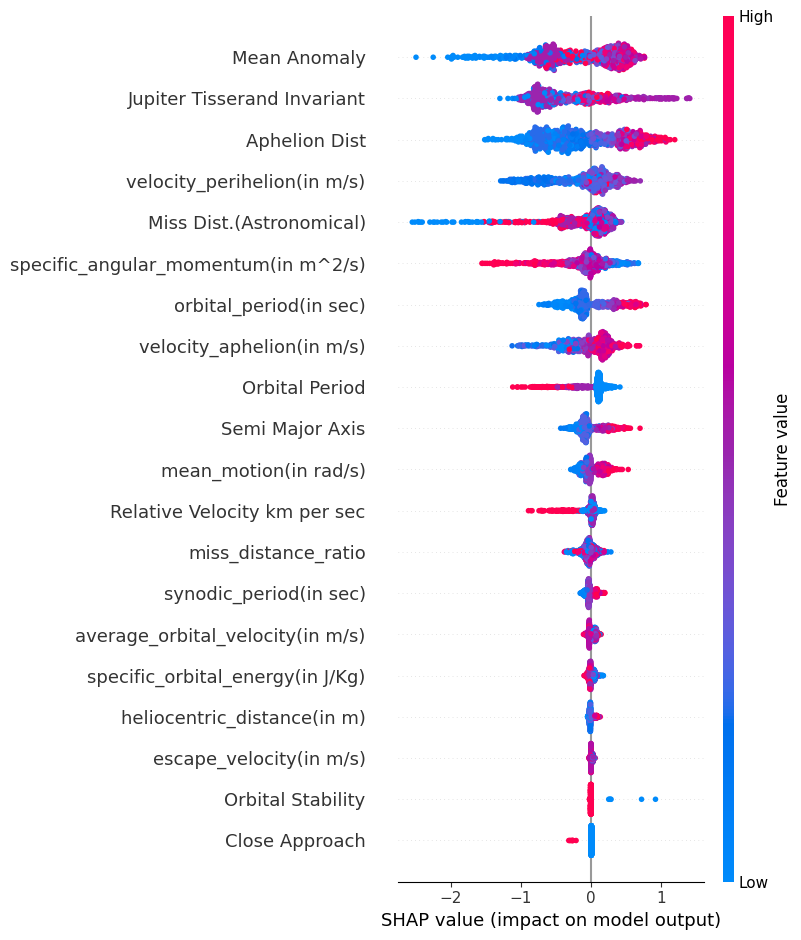

In [68]:
shap.summary_plot(shap_values, X_test)

**5. AnomalyDetection**

In [121]:
from sklearn.ensemble import IsolationForest

numeric_data = data.select_dtypes(include=['float64', 'int64'])

clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(numeric_data)

predictions = clf.predict(numeric_data)

data['Anomaly_IF'] = pd.Series(predictions).map({1: 0, -1: 1})
print("Number of anomalies detected:", data['Anomaly_IF'].sum())


Number of anomalies detected: 454


In [101]:
non_numerical_features = ['Name', 'Hazardous', 'Anomaly_IF']


In [103]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop(['Hazardous', 'Anomaly_IF'])

scaler = MinMaxScaler(feature_range=(-1, 1))
data[numerical_features] = scaler.fit_transform(data[numerical_features])



In [84]:
VALIDATE_SIZE=.2
RANDOM_SEED=42

In [87]:
from sklearn.ensemble import IsolationForest

numerical_only = data.select_dtypes(include=['float64','int64']).copy()

clf = IsolationForest(contamination=0.1, random_state=42)
pred = clf.fit_predict(numerical_only)

data['Anomaly from IsolationForest'] = (pred == -1).astype(int)


In [104]:
X_train = data.drop(columns=['Anomaly from IsolationForest']).copy()
X_test = X_train.copy()


In [105]:
#split btwn train and validation data
X_train, X_validate = train_test_split(X_train,
                                       test_size=VALIDATE_SIZE,
                                       random_state=RANDOM_SEED)


In [106]:
# Remove datetime & timedelta columns
X_train = X_train.select_dtypes(include=['float64','int64'])
X_validate = X_validate.select_dtypes(include=['float64','int64'])

input_dim = X_train.shape[1]
BATCH_SIZE = 256
EPOCHS = 100

autoencoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='elu', input_shape=(input_dim, )),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
])

autoencoder.compile(optimizer="adam", loss="mse", metrics=["acc"])

history = autoencoder.fit(
    X_train, X_train,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_validate, X_validate)
)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - acc: 0.1224 - loss: 0.4634 - val_acc: 0.8699 - val_loss: 0.2950
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.7225 - loss: 0.2941 - val_acc: 0.2437 - val_loss: 0.1987
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2181 - loss: 0.2216 - val_acc: 0.0628 - val_loss: 0.1753
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2533 - loss: 0.2020 - val_acc: 0.4631 - val_loss: 0.1644
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3968 - loss: 0.1859 - val_acc: 0.2492 - val_loss: 0.1558
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2371 - loss: 0.1791 - val_acc: 0.2679 - val_loss: 0.1500
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2820 - loss: 0.1729 - val_acc: 0.1929 - val_loss: 0.1454
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2449 - loss: 0.1672 - val_acc: 0.3175 - val_loss: 0.1385
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - ac

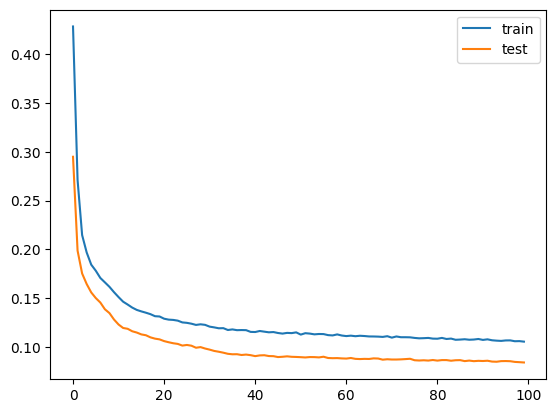

In [107]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


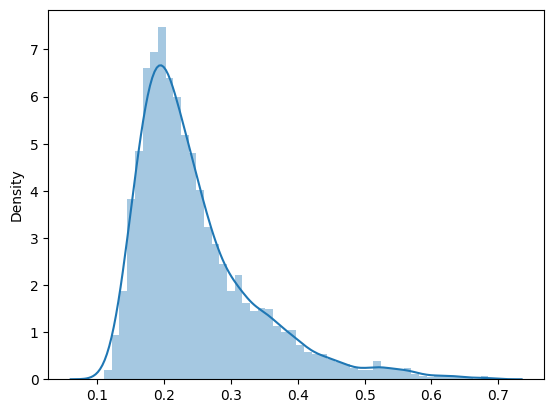

In [130]:
reconstructions = autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

sns.distplot(mse, bins=50, kde=True)

threshold = np.percentile(mse, 90)

test_score_data = pd.DataFrame(index=X_test.index)
test_score_data['loss'] = mse
test_score_data['anomaly'] = (test_score_data['loss'] >= threshold).astype(int)

data['anomaly_using_autoencoder'] = test_score_data['anomaly']


In [131]:
print("Number of anomalies detected:", data['Anomaly_IF'].sum())
print("Number of anomalies when using Autoencoder: ", data['anomaly using auto encoder'].sum())

Number of anomalies detected: 454
Number of anomalies when using Autoencoder:  454


In [166]:
data['anomaly using auto encoder'] = data['anomaly_using_autoencoder']

In [167]:
print(data['Anomaly from IsolationForest'].value_counts())
print(data['anomaly using auto encoder'].value_counts())

Anomaly from IsolationForest
0    4080
1     454
Name: count, dtype: int64
anomaly using auto encoder
0    4080
1     454
Name: count, dtype: int64


In [171]:
data['anomaly using auto encoder'] = data['anomaly_using_autoencoder']

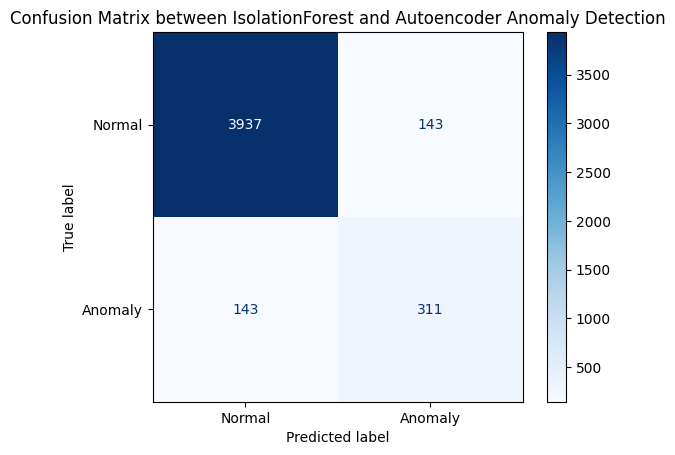

In [170]:
cm = confusion_matrix(data['Anomaly from IsolationForest'],  data['anomaly using auto encoder'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix between IsolationForest and Autoencoder Anomaly Detection')
plt.show()

In [172]:
print(f"instances were correctly classified as normal by both methods:{cm[0][0]}")
print(f"instances were predicted as anomalous by the Autoencoder but were actually normal according to the Isolation Forest:{cm[0][1]}")
print(f"instances were predicted as normal by the Autoencoder but were actually anomalous according to the Isolation Forest:{cm[1][0]}")
print(f"instances were correctly classified as anomalous by both methods :{cm[1][1]}")

instances were correctly classified as normal by both methods:3937
instances were predicted as anomalous by the Autoencoder but were actually normal according to the Isolation Forest:143
instances were predicted as normal by the Autoencoder but were actually anomalous according to the Isolation Forest:143
instances were correctly classified as anomalous by both methods :311
